In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import datetime
import morphoMaths
import pandas as pd
from scipy import io
import metrics
from MaxPlusDecoder.ShallowAE_maxPlusDecoder.shallowAE_maxplus import ShallowAE_MaxPlus
from MaxPlusDecoder.ShallowAE_maxPlusDecoder.shallowAE_maxplus_sparseNonNeg import Sparse_NonNeg_ShallowAE_MaxPlus_KLsum_NonNegConstraint
from MaxPlusDecoder.ShallowAE_maxPlusDecoder.shallowAE_maxplus_NonNeg import NonNeg_ShallowAE_MaxPlus_Between0and1Constraint

In [3]:
#Loading FashionMNIST
FILE_PATH = "../"
x_train, _, x_test, y_test = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=True, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2]=31
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [4]:
AE = ShallowAE_MaxPlus()

In [5]:
AE.train(x_train, nb_epochs=1, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 258s 4ms/step - loss: 0.1231 - mean_squared_error: 0.1231 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


In [6]:
AE = Sparse_NonNeg_ShallowAE_MaxPlus_KLsum_NonNegConstraint(sparsity_weight=0.001, sparsity_objective=0.01)

In [7]:
AE.train(x_train, nb_epochs=1, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 255s 4ms/step - loss: 0.1270 - mean_squared_error: 0.1202 - val_loss: 0.1078 - val_mean_squared_error: 0.1059


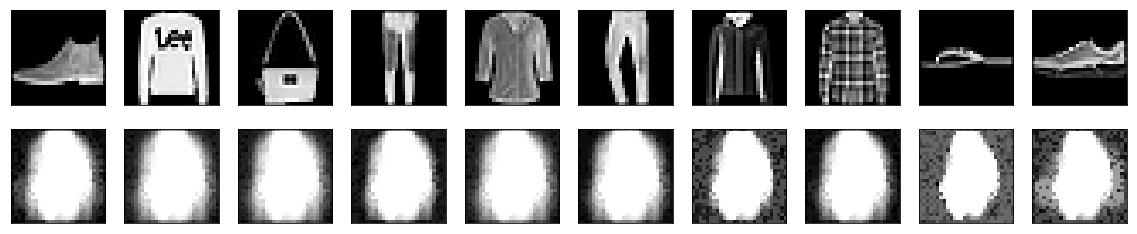

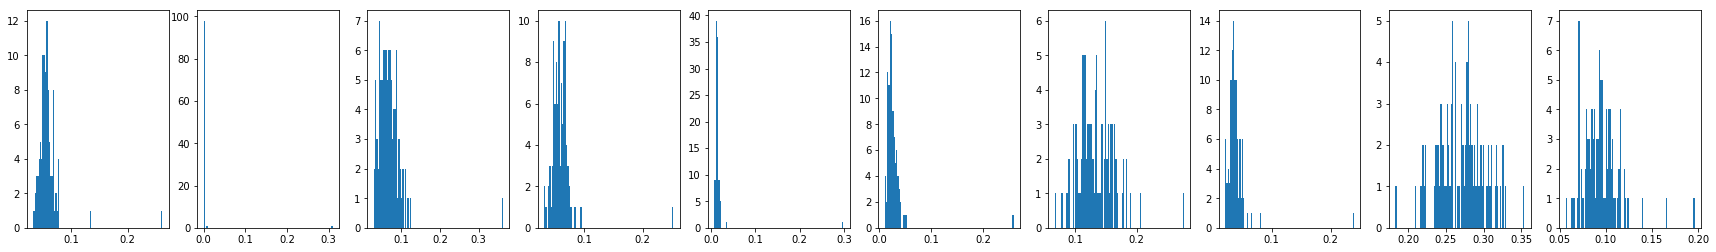

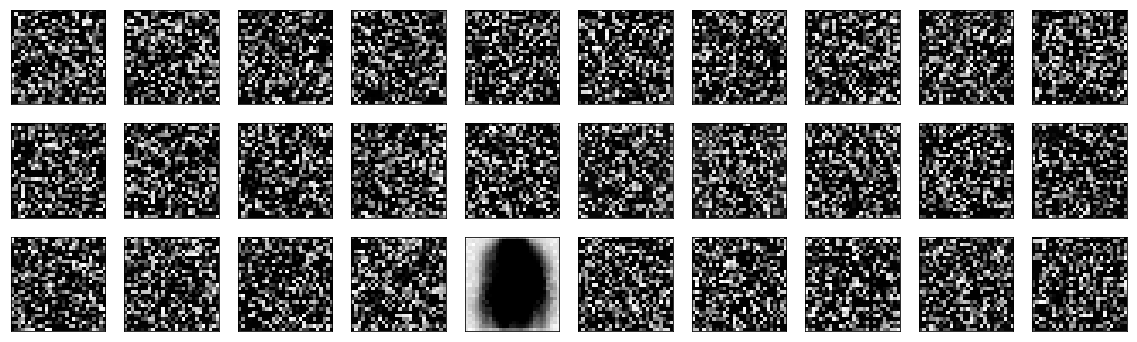

In [12]:
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

In [4]:
AE = NonNeg_ShallowAE_MaxPlus_Between0and1Constraint()

In [18]:
AE.train(x_train, nb_epochs=1, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 255s 4ms/step - loss: 0.1280 - mean_squared_error: 0.1280 - val_loss: 0.1063 - val_mean_squared_error: 0.1063


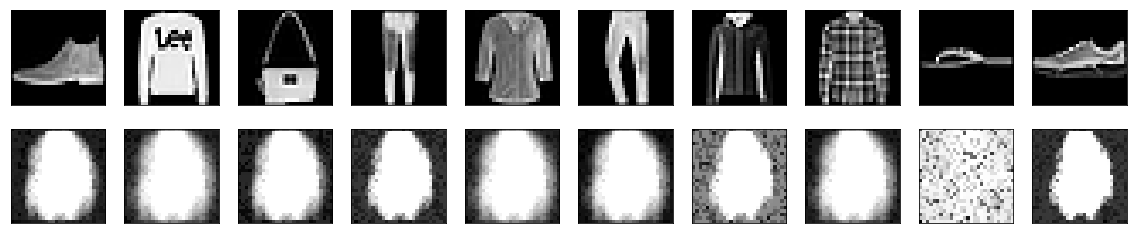

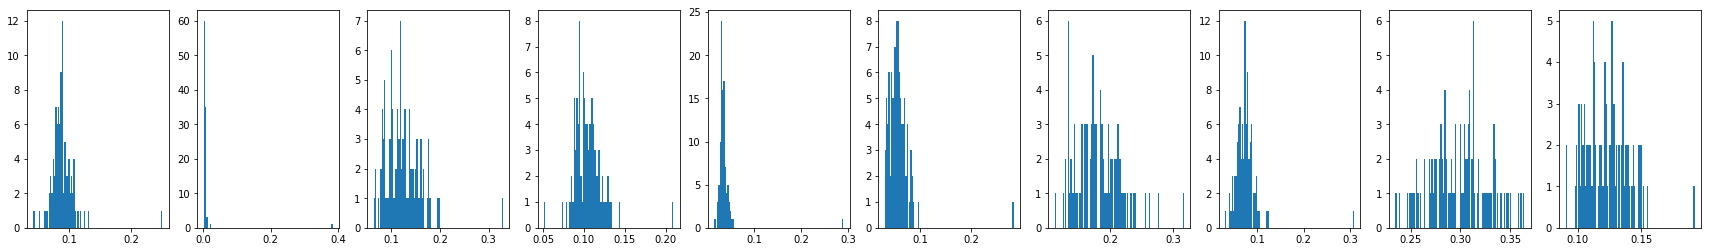

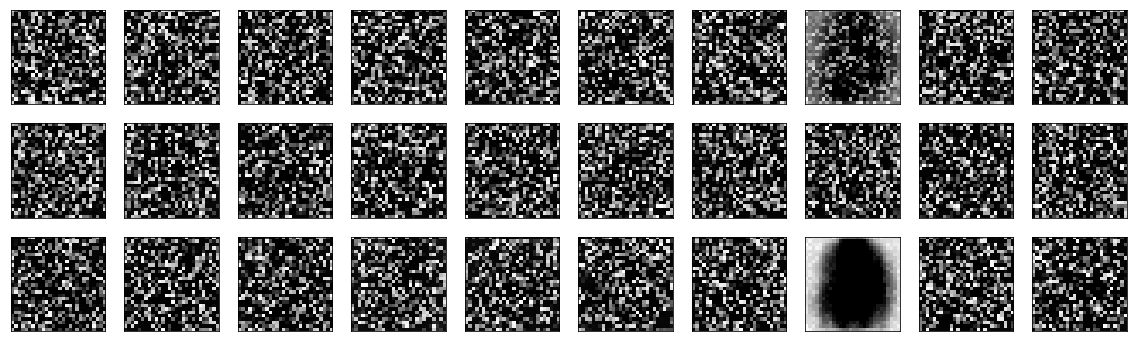

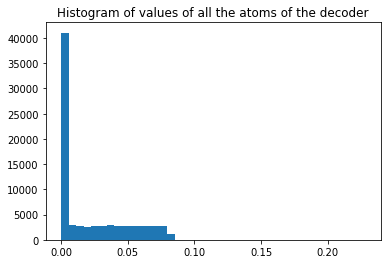

In [19]:
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()